# Learning CStree using Gibbs sampler

In [28]:
import sys
import logging
import random

from causallearn.search.ConstraintBased.PC import pc
import pandas as pd
import matplotlib.pyplot as plt
import cstrees.cstree as ct
import cstrees.scoring as sc
import cstrees.stage as st
import cstrees.learning as ctl
import networkx as nx
import numpy as np
import pp

%load_ext autoreload
%autoreload 2
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sample a random CStree

In [29]:
np.random.seed(1)
random.seed(1)
p = 10
cards = [2] * p
print("Sample CStree")
t = ct.sample_cstree(cards, 2, 0.5, 1)
print("Sample CStree parameters")
t.sample_stage_parameters(alpha=2)

Sample CStree
level 0
level 1
level 2
level 3
level 4
level 5
level 6
level 7
level 8
Sample CStree parameters


In [30]:
t.plot()

In [31]:
agraphs= t.to_minimal_context_agraphs()
print(len(agraphs))

10


None


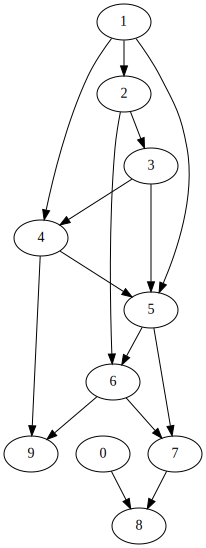

In [32]:
keys = list(agraphs.keys())
print(keys[0])
agraphs[keys[0]]


In [33]:
np.random.seed(6)
x2 = t.sample(1000)
x2

0  1  2  3  4  5  6  7  8  9
0     2  2  2  2  2  2  2  2  2  2
1     0  0  0  1  1  0  0  1  1  0
2     1  0  0  1  0  0  0  1  0  0
3     1  0  0  0  0  1  1  0  1  1
4     1  0  1  0  0  0  0  1  1  1
...  .. .. .. .. .. .. .. .. .. ..
996   1  0  1  0  1  1  1  1  0  0
997   1  0  1  0  0  0  1  0  1  0
998   1  0  1  0  0  1  1  1  1  0
999   1  1  1  0  1  0  1  0  1  0
1000  0  0  1  0  0  1  0  1  1  0

[1001 rows x 10 columns]

## Create the score tables

In [34]:
t.labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
poss_cvars = {l:random.sample(list(set(t.labels) - {l}) ,k=5) for l in t.labels}
poss_cvars

{0: [8, 1, 7, 2, 6],
 1: [9, 3, 7, 0, 5],
 2: [5, 0, 7, 6, 8],
 3: [1, 0, 4, 8, 2],
 4: [3, 5, 0, 8, 1],
 5: [6, 4, 0, 1, 9],
 6: [4, 2, 5, 8, 7],
 7: [8, 5, 3, 6, 0],
 8: [0, 4, 3, 2, 6],
 9: [3, 4, 0, 2, 7]}

In [36]:
score_table, context_scores, context_counts = sc.order_score_tables(x2, 
                                                                    max_cvars=2, 
                                                                    alpha_tot=1.0,
                                                                    method="BDeu",
                                                                    poss_cvars=poss_cvars)

Context score tables:   0%|          | 0/10 [00:00<?, ?it/s]

Order score tables: 100%|██████████| 10/10 [00:00<00:00, 18.51it/s]


## The order score tables

In [37]:
score_table

{'poss_cvars': {0: [8, 1, 7, 2, 6],
  1: [9, 3, 7, 0, 5],
  2: [5, 0, 7, 6, 8],
  3: [1, 0, 4, 8, 2],
  4: [3, 5, 0, 8, 1],
  5: [6, 4, 0, 1, 9],
  6: [4, 2, 5, 8, 7],
  7: [8, 5, 3, 6, 0],
  8: [0, 4, 3, 2, 6],
  9: [3, 4, 0, 2, 7]},
 'scores': {0: {'None': -499.37493459344023,
   '1': -499.90288477455266,
   '2': -499.90758073006054,
   '6': -499.9399198652139,
   '7': -499.8904601274602,
   '8': -493.6546088666731,
   '1,2': -501.10869419839645,
   '1,6': -501.1436703305086,
   '1,7': -501.0941939213559,
   '1,8': -494.81545844530706,
   '2,6': -501.14440835588994,
   '2,7': -501.0977463028892,
   '2,8': -494.87031946915033,
   '6,7': -501.1339335372019,
   '6,8': -494.86932547889484,
   '7,8': -494.8071512772273,
   '1,2,6': -502.1917155749669,
   '1,2,7': -502.1453067063801,
   '1,2,8': -495.8812413199403,
   '1,6,7': -502.18374112132983,
   '1,6,8': -495.880855009954,
   '1,7,8': -495.8227719712053,
   '2,6,7': -502.1834389067014,
   '2,6,8': -495.93527651509504,
   '2,7,8': -495

## The context score tables

In [38]:
context_scores

{'cards': {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2},
 'scores': {0: {'None': -497.0723495004462,
   '1=0': -445.7847455500714,
   '1=1': -54.07367623663876,
   '2=0': -373.1123672600497,
   '2=1': -126.83015558558395,
   '6=0': -282.3083527850613,
   '6=1': -218.53350799902933,
   '7=1': -269.4406684253013,
   '7=0': -230.22280185274667,
   '8=0': -237.83215907506997,
   '8=1': -252.93390116281216,
   '1=0,2=0': -327.80725938975274,
   '1=0,2=1': -121.71448799035807,
   '1=1,2=0': -48.668658477767934,
   '1=1,2=1': -7.915127576412129,
   '1=0,6=0': -252.952181700776,
   '1=0,6=1': -197.15253318546092,
   '1=1,6=0': -32.98390488549336,
   '1=1,6=1': -23.948788771132094,
   '1=0,7=1': -243.23670504549364,
   '1=0,7=0': -205.79547897989983,
   '1=1,7=0': -27.835326771104974,
   '1=1,7=1': -29.468826482057665,
   '1=0,8=0': -217.64302826484618,
   '1=0,8=1': -222.6724776843348,
   '1=1,8=1': -33.2128670197404,
   '1=1,8=0': -23.598350853648924,
   '2=0,6=0': -251.9421588

## Run the Gibbs sampler

In [39]:
orders2, scores2 = ctl.gibbs_order_sampler(2000, score_table)

initial order: [4, 2, 5, 8, 9, 7, 1, 0, 6, 3]
initial score: -5975.09766175822


Gibbs order sampler:   0%|          | 0/2000 [00:00<?, ?it/s]

Gibbs order sampler: 100%|██████████| 2000/2000 [00:01<00:00, 1714.70it/s]


### Trajectory score plots

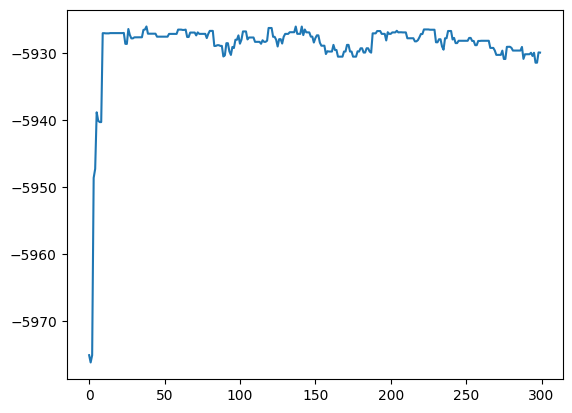

In [40]:
plt.plot(scores2[:300])

### Order position plots

Get the individual variables locations in the order and plot them

In [41]:
var_positions = {var: [x.index(var) for x in orders2] for var in orders2[0]}
var_positions["iteration"] = list(range(len(orders2))) 
plotdf = pd.DataFrame(var_positions)

<Axes: xlabel='iteration'>

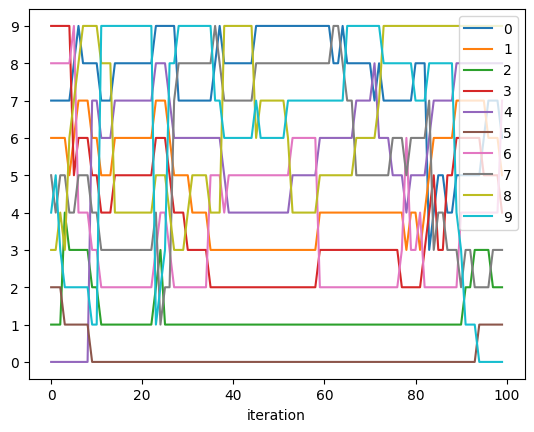

In [42]:
plotdf[:100].plot(x = "iteration", y = range(p), yticks=range(len(orders2[0])))

### Get the maximal scoring order

-13153.787744225923

In [43]:
max(scores2)
maxi = scores2.index(max(scores2))
maporder = orders2[maxi]
maporder

[5, 2, 3, 1, 4, 9, 7, 8, 0, 6]

### Get the maximal scoring CStree for the order

In [44]:
opttree = ctl._optimal_cstree_given_order(maporder, context_scores)

## Estimate the CStree parameters

In [45]:
opttree.estimate_stage_parameters(x2, alpha_tot=2.0, method="BDeu")
opttree.plot()

## Plot the DAG representation

In [48]:
agraphs= opttree.to_minimal_context_agraphs()
len(agraphs)

2

X2=1


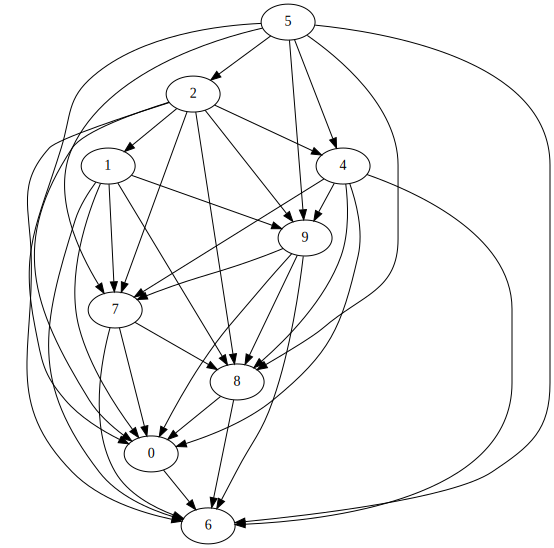

In [49]:
keys = list(agraphs.keys())
print(keys[0])
agraphs[keys[0]]
